In [5]:
from math import exp

import numpy as np
import matplotlib.pyplot as plt

In [6]:
def flip_angle_signal(alpha, TR, TE, T1, T2_star):
    radians = alpha * np.pi / 180
    numerator = (1 - np.exp(-TR/T1)) * np.sin(radians)
    denominator = 1 - np.exp(-TR/T1) * np.cos(radians)
    return (numerator / denominator) * np.exp(-TE/T2_star)

In [79]:
alpha = np.linspace(0, 90, 100)
T1 = 1000, 1100
TE = 5
T2_star = 50
TR = 100


tissue_1 = flip_angle_signal(alpha, TR, TE, T1[0], T2_star)
tissue_2 = flip_angle_signal(alpha, TR, TE, T1[1], T2_star)

diff = np.absolute(tissue_1 - tissue_2)
max_diff_angle = alpha[np.where(diff == diff.max())][0]

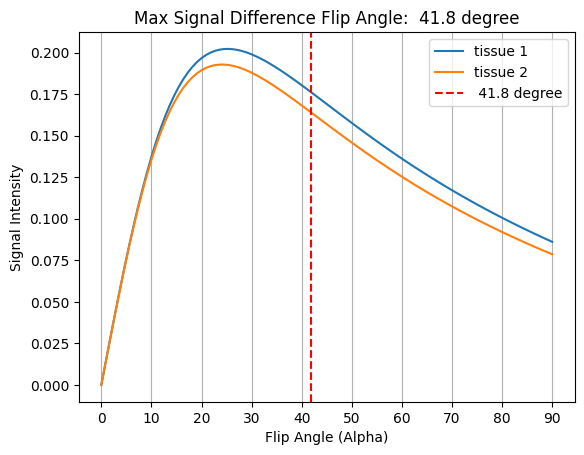

In [80]:
plt.figure()
plt.plot(alpha, tissue_1, label='tissue 1')
plt.plot(alpha, tissue_2, label='tissue 2')
plt.axvline(x=max_diff_angle, label=f'{max_diff_angle: 2.1f} degree', color='r', linestyle='--')
plt.legend()
plt.title(f'Max Signal Difference Flip Angle: {max_diff_angle: 2.1f} degree')
plt.ylabel('Signal Intensity')
plt.xlabel('Flip Angle (Alpha)')
plt.xticks(np.arange(0, 100, 10))
plt.grid(visible=True, axis='x')
plt.savefig('prob2.svg')
plt.show()